In [81]:
%reload_ext autoreload
%autoreload 2
from ripple_heterogeneity.utils import loading,functions,well_traversal_classification
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib
import nelpy as nel

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [84]:
basepath = r"Z:\Data\HMC2\day11"
position_df = loading.load_animal_behavior(basepath)
beh_epoch = loading.load_epoch(basepath)

In [85]:
beh_epoch

,name,startTime,stopTime,environment,behavioralParadigm,notes
0,presleep_221020_095611,0.0000,8006.29115,sleep,NaN,NaN
1,tmaze_221020_121026,8006.2912,9009.95835,tmaze,NaN,NaN
2,postsleep_221020_122718,9009.9584,18089.08155,sleep,NaN,NaN
3,wmaze_221020_150522,18089.0816,20117.13275,wmaze,delayed,10 sec delay
4,postsleep_221020_154412,20117.1328,27840.00000,sleep,NaN,NaN


In [88]:
position_df.time

0          8018.28125
1          8018.30625
2          8018.33125
3          8018.35625
4          8018.38125
             ...     
120077    20114.23225
120078    20114.25725
120079    20114.28225
120080    20114.30725
120081    20114.33225
Name: time, Length: 120082, dtype: float64

In [91]:
beh_epoch.query("environment == 'tmaze'").startTime.values

array([8006.2912])

In [93]:
# beh_epoch.query("environment == 'tmaze'").startTime
idx = position_df.time.between(beh_epoch.query("environment == 'tmaze'").startTime.values[0],beh_epoch.query("environment == 'tmaze'").stopTime.values[0])
position_df = position_df[idx]

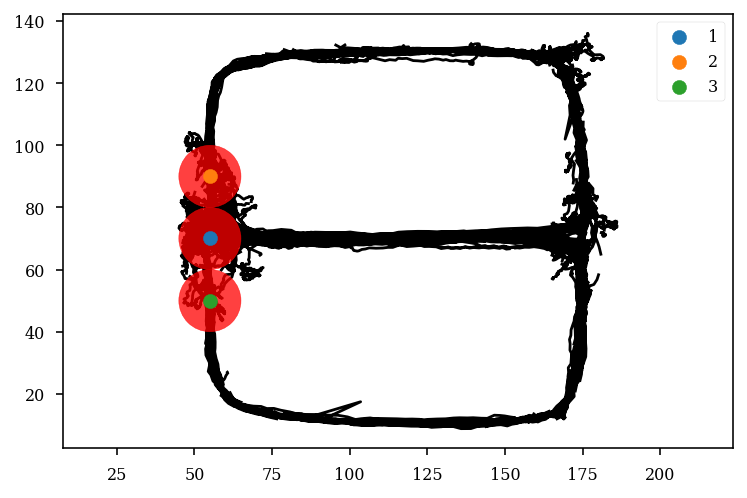

In [141]:
center_well = [55,70]
well_locations = np.array([
    center_well,
    [
        center_well[0],
        center_well[1]+20,
    ],
    [
        center_well[0],
        center_well[1]-20,
    ]
])
plt.plot(position_df.x,position_df.y,color="k")
plt.axis("equal")
for xy_i, xy in enumerate(well_locations):
    plt.scatter(xy[0], xy[1], s=50,label = xy_i+1,zorder=100)
    circle1 = plt.Circle((xy[0], xy[1]), 10, color='r',alpha=.75,zorder=80)
    plt.gca().add_patch(circle1)
plt.legend()

In [140]:
a = b = \
    c = 'string'
a,b,c

('string', 'string', 'string')

0.85

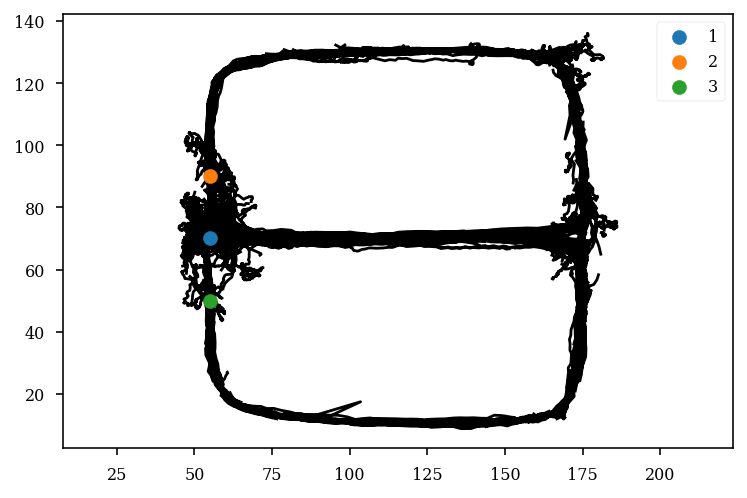

In [147]:
center_well = [55,70]
well_locations = np.array([
    center_well,
    [
        center_well[0],
        center_well[1]+20,
    ],
    [
        center_well[0],
        center_well[1]-20,
    ]
])
plt.plot(position_df.x,position_df.y,color="k")
plt.axis("equal")
for xy_i, xy in enumerate(well_locations):
    plt.scatter(xy[0], xy[1], s=50,label = xy_i+1,zorder=100)
plt.legend()
temp_df = position_df[~np.isnan(position_df.x)]

segments_df, _ = well_traversal_classification.segment_path(
    temp_df["timestamps"].values,
    temp_df[["x", "y"]].values,
    well_locations,
    max_distance_from_well=10,
)
x_range = position_df.x.max() - position_df.x.min()
segments_df = segments_df.query("distance_traveled > @x_range")
segments_df = segments_df.query("from_well == 1.0")

segments_df
next_trial_diff = np.diff(segments_df.to_well)
t_maze_prop_correct = sum(next_trial_diff != 0) / len(next_trial_diff)
t_maze_prop_correct

In [ ]:
well_locations = np.array(
    [
        [
            position_df.projected_x.min(),
            position_df.projected_y.mean(),
        ],
        [
            position_df.projected_x.max(),
            position_df.projected_y.max(),
        ],
        [
            position_df.projected_x.max(),
            position_df.projected_y.min(),
        ],
    ]
)

(28.03399570371949, 138.03399570371948, 11.817015625079968, 106.67037632234852)

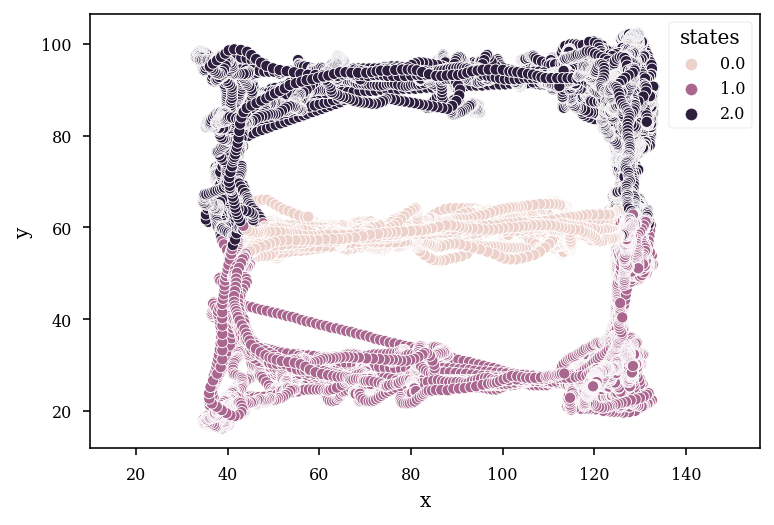

In [15]:
sns.scatterplot(data=position_df,x="x",y="y",hue="states")
plt.axis("equal")

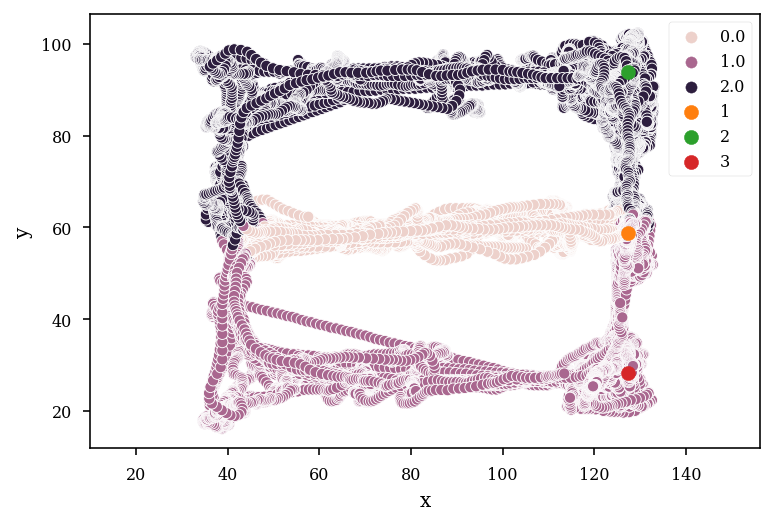

In [35]:
well_locations = np.array(
    [
        [
            position_df.query("states == 0").projected_x.max(),
            position_df.query("states == 0").projected_y.mean(),
        ],
        [
            position_df.query("states == 2").projected_x.max(),
            position_df.query("states == 2").projected_y.max(),
        ],
        [
            position_df.query("states == 1").projected_x.max(),
            position_df.query("states == 1").projected_y.min(),
        ],
    ]
)
sns.scatterplot(data=position_df, x="x", y="y", hue="states")
plt.axis("equal")
for xy_i, xy in enumerate(well_locations):
    plt.scatter(xy[0], xy[1], s=50,label = xy_i+1)
plt.legend()
temp_df = position_df[~np.isnan(position_df.x)]

segments_df, _ = well_traversal_classification.segment_path(
    temp_df["timestamps"].values,
    temp_df[["projected_x", "projected_y"]].values,
    well_locations,
    max_distance_from_well=10,
)
x_range = position_df.projected_x.max() - position_df.projected_x.min()
segments_df = segments_df.query("distance_traveled > @x_range")

(37.94962608383929, 193.05785223937485, 2.443156612182679, 142.40189475376033)

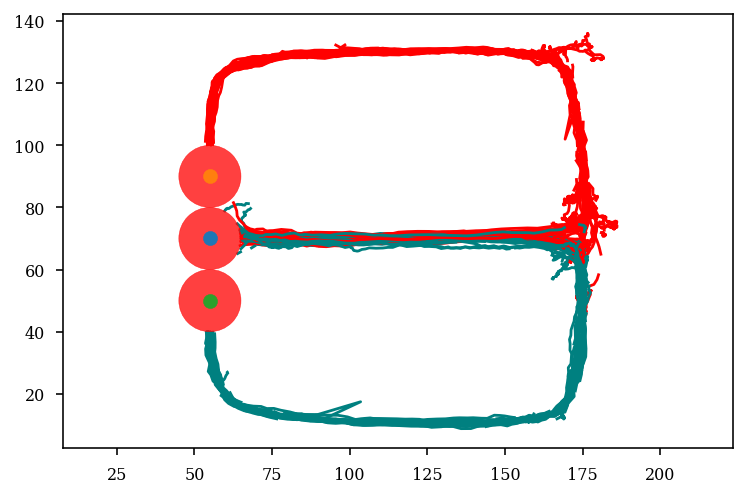

In [145]:
for temp_df in segments_df.itertuples():
    idx = position_df.time.between(temp_df.start_time,temp_df.end_time)
    if temp_df.to_well == 2:
        plt.plot(position_df[idx].x,position_df[idx].y,color='r')
    if temp_df.to_well == 3:
        plt.plot(position_df[idx].x,position_df[idx].y,color='teal')

for xy_i, xy in enumerate(well_locations):
    plt.scatter(xy[0], xy[1], s=50,label = xy_i+1,zorder=100)
    circle1 = plt.Circle((xy[0], xy[1]), 10, color='r',alpha=.75,zorder=80)
    plt.gca().add_patch(circle1)
plt.axis("equal")

In [71]:
np.insert(0,1,np.diff(segments_df.to_well))

array([ 0,  0,  1,  0, -1,  0,  1,  0, -1,  0,  1,  0,  0, -1,  1, -1,  0,
        0,  1,  0,  0, -1,  0,  1,  0, -1,  1, -1,  1,  0,  0, -1,  0,  1,
        0, -1,  1, -1,  1,  0, -1,  0,  1, -1,  1,  0])

In [74]:
np.insert(1,1,np.diff(segments_df.to_well))

array([ 0,  0,  1,  0, -1,  0,  1,  0, -1,  0,  1,  0,  0, -1,  1, -1,  0,
        0,  1,  0,  0, -1,  0,  1,  0, -1,  1, -1,  1,  0,  0, -1,  0,  1,
        0, -1,  1, -1,  1,  0, -1,  0,  1, -1,  1,  0])

In [79]:
segments_df.loc[np.insert(1,1,np.diff(segments_df.to_well)) != 0,"is_correct"] = True
segments_df.loc[np.insert(1,1,np.diff(segments_df.to_well)) == 0,"is_correct"] = False

segments_df

,start_time,end_time,duration,from_well,to_well,distance_traveled,is_correct
segment,,,,,,,
5,5050.6976,5056.7136,6.0160,1.0,2.0,181.886185,True
24,5138.1728,5143.3440,5.1712,1.0,2.0,184.449901,False
52,5220.7328,5224.7776,4.0448,1.0,3.0,174.354474,True
54,5267.9136,5271.7792,3.8656,1.0,3.0,173.927775,False
57,5318.1152,5322.6976,4.5824,1.0,2.0,183.811463,True
60,5348.7328,5365.2448,16.5120,1.0,2.0,216.558745,False
63,5387.3632,5390.9472,3.5840,1.0,3.0,173.866772,True
65,5414.7808,5418.4416,3.6608,1.0,3.0,173.709458,False
67,5443.5552,5447.8560,4.3008,1.0,2.0,182.043547,True


In [80]:
next_trial_diff = np.diff(segments_df.to_well)
t_maze_prop_correct = sum(next_trial_diff != 0) / len(next_trial_diff)
t_maze_prop_correct

0.5555555555555556